Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0

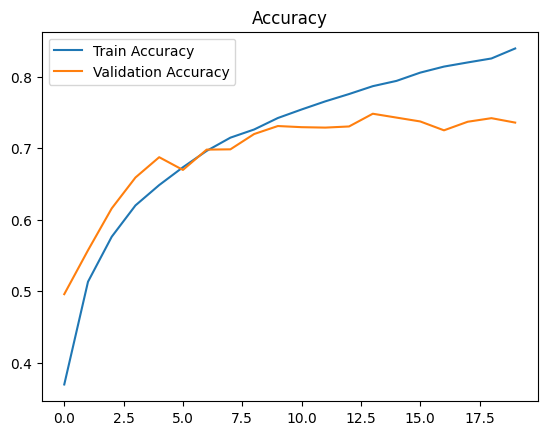

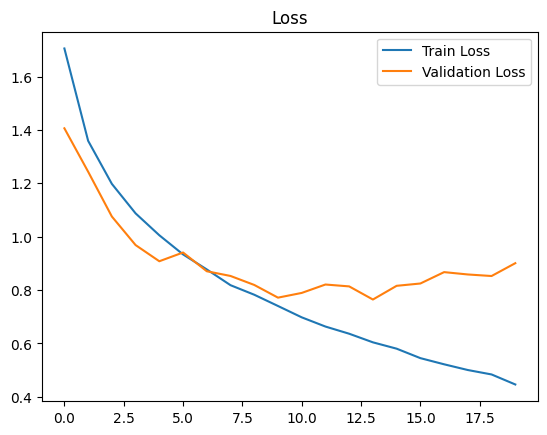

313/313 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0     0.7459    0.7310    0.7384      1000
           1     0.8664    0.8040    0.8340      1000
           2     0.5991    0.6500    0.6235      1000
           3     0.5112    0.5920    0.5487      1000
           4     0.7118    0.6420    0.6751      1000
           5     0.6137    0.6530    0.6328      1000
           6     0.9169    0.6070    0.7304      1000
           7     0.7315    0.7900    0.7596      1000
           8     0.8095    0.8330    0.8211      1000
           9     0.7563    0.8410    0.7964      1000

    accuracy                         0.7143     10000
   macro avg     0.7262    0.7143    0.7160     10000
weighted avg     0.7262    0.7143    0.7160     10000



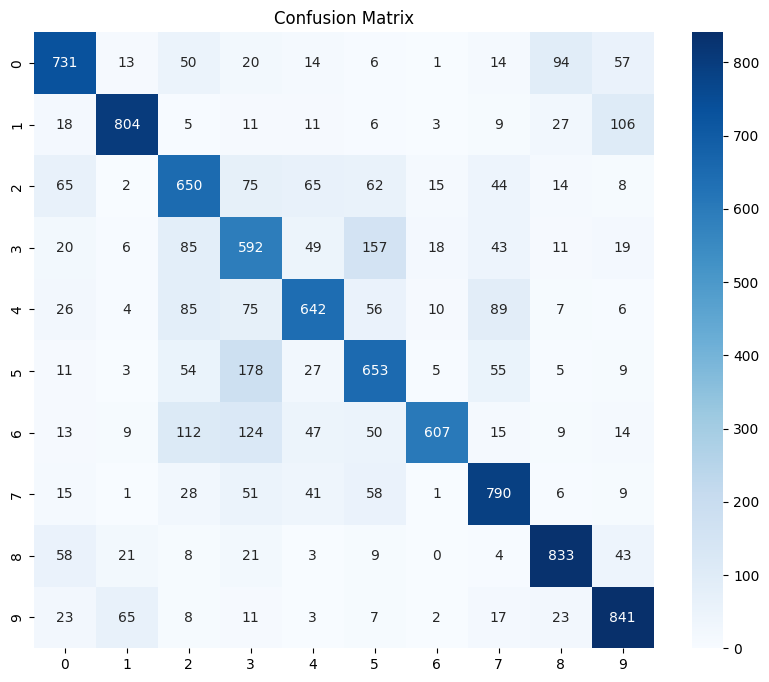

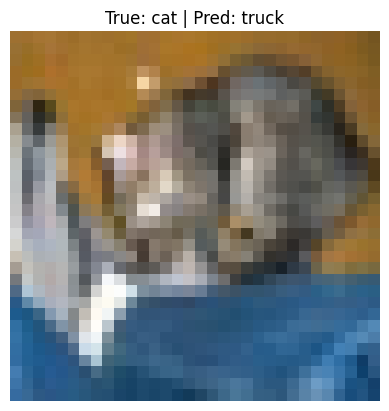

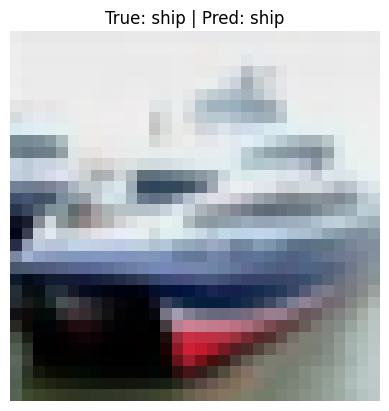

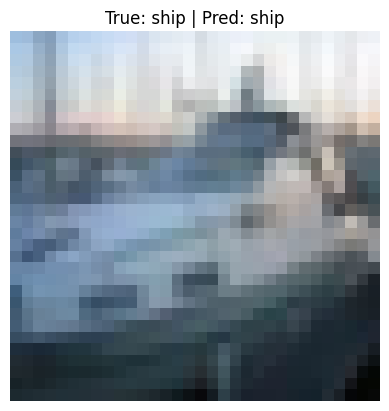

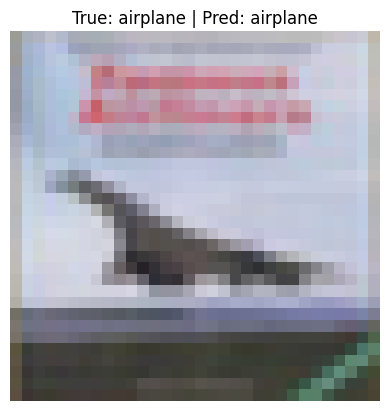

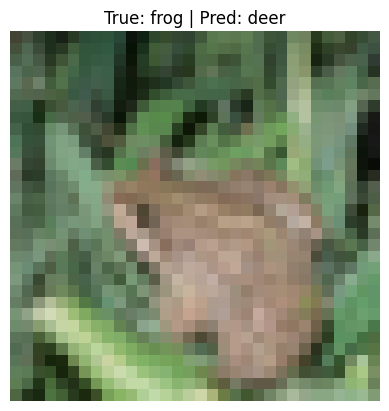

In [4]:
#  Step 1: Imports and Load Data
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

def load_cifar10_batch(batch_filename):
    with open(batch_filename, 'rb') as f:
        batch = pickle.load(f, encoding='bytes')
        data = batch[b'data']
        labels = batch[b'labels']
        data = data.reshape(len(data), 3, 32, 32).transpose(0, 2, 3, 1)
        return data, labels

def load_cifar10_data(data_dir):
    x_train = []
    y_train = []
    for i in range(1, 6):
        batch_file = os.path.join(data_dir, f'data_batch_{i}')
        data, labels = load_cifar10_batch(batch_file)
        x_train.append(data)
        y_train.extend(labels)
    x_train = np.concatenate(x_train)
    y_train = np.array(y_train)

    test_file = os.path.join(data_dir, 'test_batch')
    x_test, y_test = load_cifar10_batch(test_file)
    y_test = np.array(y_test)

    return (x_train, y_train), (x_test, y_test)

#  Step 2: Data Preprocessing
data_dir = 'cifar-10-batches-py'
(x_train_full, y_train_full), (x_test, y_test) = load_cifar10_data(data_dir)

x_train_full = x_train_full.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train_full[:45000]
x_val = x_train_full[45000:]
y_train = y_train_full[:45000]
y_val = y_train_full[45000:]

y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test_cat = to_categorical(y_test, 10)

#  Step 3: Define CNN Model (<1M params)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

#  Step 4: Compile and Train
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    epochs=20,
                    batch_size=64)

#  Step 5: Plot Accuracy & Loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss")
plt.legend()
plt.show()

#  Step 6: Evaluation
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()

print(classification_report(y_true, y_pred_labels, digits=4))

cm = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

#  Step 7: Visualize Predictions
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

for i in range(5):
    plt.imshow(x_test[i])
    plt.title(f"True: {class_names[y_true[i]]} | Pred: {class_names[y_pred_labels[i]]}")
    plt.axis('off')
    plt.show()